https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones
-> Data Folder -> UCI HAR Dataset.zip
UCI HAR Dataset 복붙 -> 폴더 이름 변경 human_activity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 전처리, 콜럼 정보가 별도로 든 파일, 중복 콜럼명
feature_name_df = pd.read_csv('human_activity/features.txt',
                 sep = '\s+',
                 header = None,
                 names = ['column_index','column_name'])
# human_activity/features.txt 컬럼 정보가 든 파일


# 구분자가 콤마가 아니기 때문에, 데이터를 확인하고, sep를 별도로 지정해야한다.
# 해당 데이터의 경우 줄바꿈으로 데이터가 구분 되어 있다. => sep = '\s+'

In [3]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [4]:
#중복 컬럼명 확인

# 콜럼명 열거형 추출 (파일 자체가 콜럼명 데이터이다.)
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [5]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [6]:
#중복 컬럼을 나타낼 데이터 생성
feature_dup_df= feature_name_df.groupby('column_name').count()


In [7]:
# feature_dup_df['column_index']

In [43]:
#중복 컬럼명 확인
feature_dup_df[feature_dup_df['column_index']>1].count()

column_index    42
dtype: int64

In [9]:
# 중복 컬럼 명칭 수정 함수
def get_new_df(old_df):
    # 컬럼이름 재 정의,  기존 콜럼 -> 기존 콜럼_1 중복 시 기존콜럼_2
    
    dup_df = pd.DataFrame(data= old_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    # cumcount() 0부터 시작해서 1 씩 증가
    dup_df = dup_df.reset_index()
    new_df = pd.merge(old_df.reset_index(), dup_df, how='outer')
    # reser_index  ??? index를 기준으로 병합???
    new_df['column_name'] = new_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0],axis=1)
    new_df.drop(columns=['index'],inplace=True)
    return new_df

In [10]:
df = get_new_df(feature_name_df)

In [11]:
df.head(2)

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0


In [12]:
df[df['dup_cnt']== 0]

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [13]:
# 데이터 불러오기 및 전처리
def get_human_dataset() :
    feature_name_df = pd.read_csv('human_activity/features.txt',
                 sep = '\s+',
                 header = None,
                 names = ['column_index','column_name'])
    
    name_df = get_new_df(feature_name_df)
    feature_name = name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('human_activity/train/X_train.txt',
                          sep = '\s+',
                          names = feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt',
                          sep = '\s+',
                          names = feature_name)
    y_train = pd.read_csv('human_activity/train/y_train.txt',
                          sep = '\s+',
                          names = ['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt',
                          sep = '\s+',
                          names = ['action'])
    # 각 파일은 줄바꿈으로 데이터가 구분된다.
    
    return X_train, X_test, y_train, y_test
    

In [14]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [16]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
# 모델 생성, 학습, 예측, 평가
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test,pred)

0.8547675602307431

In [19]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# 파라미터 별 모델 성능 확인
params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split': [16],
    
}

grid_cv = GridSearchCV(dt_clf, params, scoring = 'accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)


# verbose 로그같은 내용이 찍히는지 설정
# 작업이 길어질 경우. 진행이 되고 있는지 확인하기 위한 용도



Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [16]},
             scoring='accuracy', verbose=1)

In [22]:
%%time
# 시간이 얼마나 걸리는지 확인
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Wall time: 1min 18s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [16]},
             scoring='accuracy', verbose=1)

In [23]:
grid_cv.best_score_

0.8548794147162603

In [24]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [25]:
cv_result = pd.DataFrame(grid_cv.cv_results_)

In [26]:
cv_result[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [27]:
max_depth = [6,8,10,12,16,20,24]
for depth in max_depth :
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accurary = accuracy_score(y_test,pred)
    print(f'max_depth:{depth} 정확도:{accurary:.4f}')

max_depth:6 정확도:0.8551
max_depth:8 정확도:0.8717
max_depth:10 정확도:0.8599
max_depth:12 정확도:0.8571
max_depth:16 정확도:0.8599
max_depth:20 정확도:0.8565
max_depth:24 정확도:0.8565


In [28]:
# 파라미터 별 모델 성능 확인2 (별 차이 없음)
%%time
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split': [16, 24],
    
}

grid_cv = GridSearchCV(dt_clf, params, scoring = 'accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 1min 34s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24,
                                              min_samples_split=16,
                                              random_state=156),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [29]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [30]:
grid_cv.best_score_

0.8548794147162603

In [31]:
%%time
params = {
    'max_depth' : [8],
    'min_samples_split': [8, 12, 16, 20, 24],
    
}

grid_cv = GridSearchCV(dt_clf, params, scoring = 'accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 46.7 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24,
                                              min_samples_split=16,
                                              random_state=156),
             param_grid={'max_depth': [8],
                         'min_samples_split': [8, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [32]:

grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [33]:
grid_cv.best_score_

0.8548794147162603

In [34]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,pred)

0.8717339667458432

In [35]:
grid_cv.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

In [36]:
pd.Series(grid_cv.best_estimator_.feature_importances_)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.001752
         ...   
556    0.001291
557    0.000000
558    0.000989
559    0.139001
560    0.002987
Length: 561, dtype: float64

In [37]:
pd.Series(grid_cv.best_estimator_.feature_importances_, index = X_train.columns)

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.001752
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001291
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000989
angle(Y,gravityMean)                    0.139001
angle(Z,gravityMean)                    0.002987
Length: 561, dtype: float64

In [38]:
data = pd.Series(grid_cv.best_estimator_.feature_importances_, index = X_train.columns)

In [39]:
data.sort_values(ascending=False)[:10]

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
dtype: float64

In [40]:
top10 = data.sort_values(ascending=False)[:10]

In [41]:
import seaborn as sns

<AxesSubplot:>

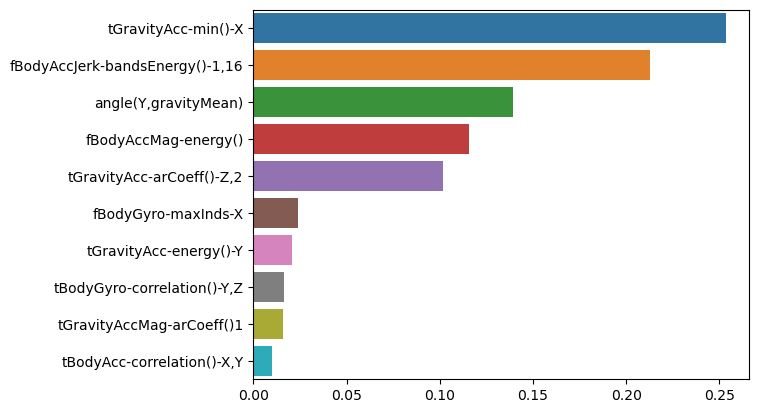

In [42]:
sns.barplot(x = top10,y = top10.index)